<a href="https://colab.research.google.com/github/Shivani-Nautiyal/car_price_prediction/blob/main/car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction**

In [ ]:
#!/bin/bash
!curl -L -o /car-price-prediction-challenge.zip\
  https://www.kaggle.com/api/v1/datasets/download/deepcontractor/car-price-prediction-challenge

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  429k  100  429k    0     0  1002k      0 --:--:-- --:--:-- --:--:-- 1002k


In [ ]:
!unzip /car-price-prediction-challenge.zip

Archive:  /car-price-prediction-challenge.zip
  inflating: car_price_prediction.csv  


# Step 1: Import Required Libraries

In [ ]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data Splitting
from sklearn.model_selection import train_test_split

# Preprocessing and Modeling Tools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset

In [ ]:
df = pd.read_csv('/content/car_price_prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


I saw that the dataset has a good number of rows (19,237) and 18 columns. My target column is 'Price'.

First impression — mix of numerical and categorical data.

# Step 3: Initial Data Exploration

In [ ]:
print("Shape:", df.shape)


Shape: (19237, 18)


In [ ]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


Price varies a lot — from ₹1 to over ₹2.6 crore — indicating strong outliers.

Production Year spans from 1939 to 2020, but most cars are made around 2012.

Most cars have 4 cylinders and around 6 airbags, showing common engine and safety features.

High standard deviation in price and airbags suggests data is spread out, needing possible scaling or cleaning before modeling.

In [ ]:
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


No null values.

# Step 4: Data Cleaning & Preprocessing

*Identify Columns*

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


*Visualize Outliers*

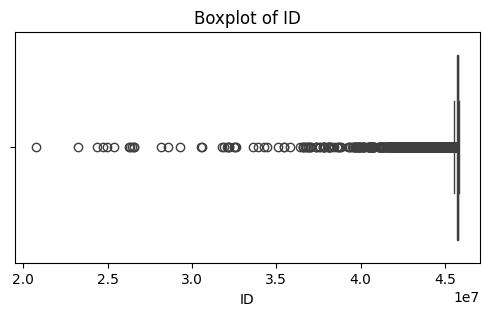

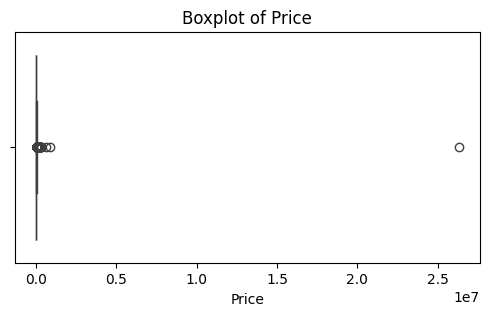

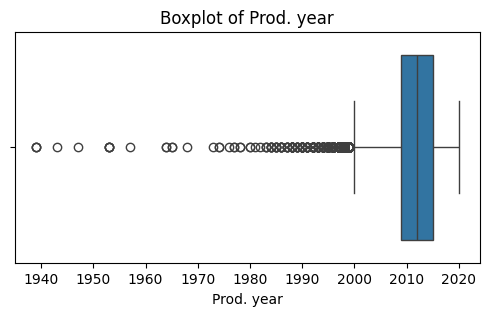

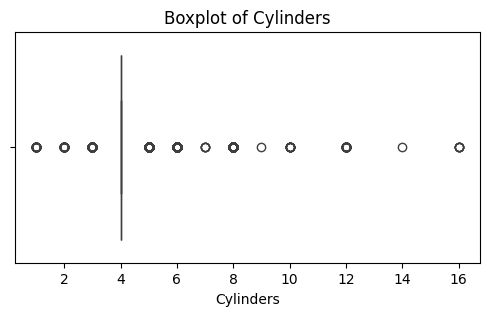

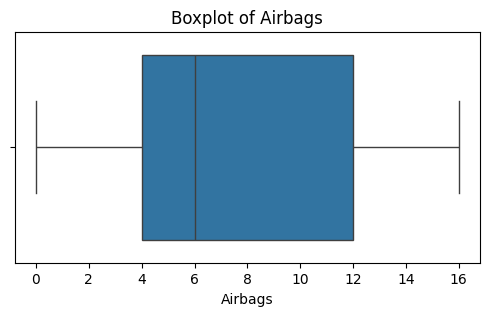

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


ID: Most ID values are tightly packed, with several outliers on the lower side. ID may not be useful for modeling.

Price: Shows a strong right skew with extreme outliers — indicating a few cars with very high prices.

Production Year: Data is mostly from 2000 to 2020, but outliers exist for older models dating back to the 1940s.

Cylinders: The majority of vehicles have 4 cylinders, but many other values are present as outliers.

Airbags: The distribution is relatively uniform with no extreme outliers, but variation is high.

Conclusion: Price, Production Year, and Cylinders show significant variability and outliers, which should be handled carefully during modeling.

*Setup Preprocessor*

In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_features),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])


Used pipeline to impute and scale numeric data and encode categorical features.

Pipelines make preprocessing neat and avoid data leakage.

# Step 5: Exploratory Data Analysis (EDA)

*Price Distribution*

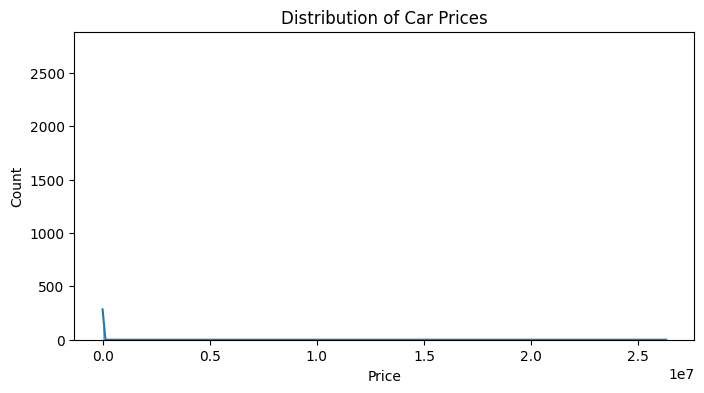

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of Car Prices")
plt.show()


The histogram shows a heavily right-skewed distribution of car prices:

Most cars are priced in the lower range, with a sharp peak near the left.

A few extremely high-priced cars create a long tail, indicating the presence of outliers.

*Correlation Heatmap*

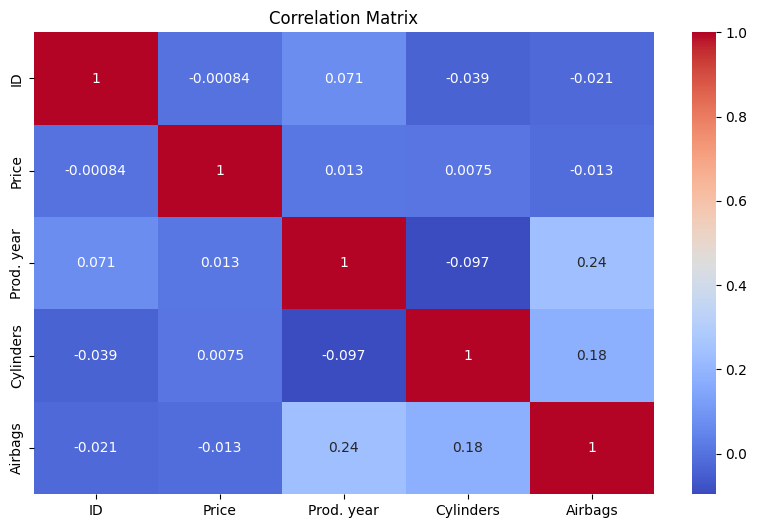

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Price shows very weak correlation with all features (close to 0), indicating non-linear or complex relationships.

Production Year and Airbags have a moderate positive correlation  — newer cars tend to have more airbags.

Cylinders also has a mild positive correlation with Airbags (0.18).

ID has no significant correlation with any feature, confirming it is just an identifier.

👉 Overall, no feature shows strong linear correlation with Price, so non-linear models like Random Forest are more suitable.

*Boxplot (Categorical vs Target)*

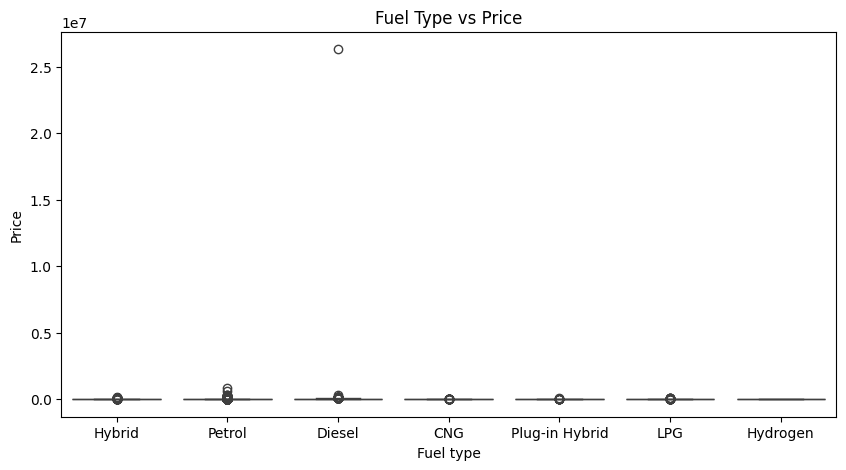

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel type", y="Price", data=df)
plt.title("Fuel Type vs Price")
plt.show()


Visuals gave me insights like :-

Year and Engine are positively correlated with price

Fuel_Type and other categories clearly impact the price.

Price is right-skewed.

# Step 6: Model Building & Evaluation

*Define and Train Models*

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM": SVR(),
    "KNN": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"R2 Score": round(r2, 3), "RMSE": round(rmse, 3)}

pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)


,R2 Score,RMSE
Random Forest,0.682,9953.221
SVM,-0.040,18001.343
KNN,-22.445,85471.779
Linear Regression,-25.605,91049.021


Random Forest performed the best with highest R² and lowest RMSE.

Pipelines helped train all models consistently.

# Step 7: Model Interpretation (Feature Importance)

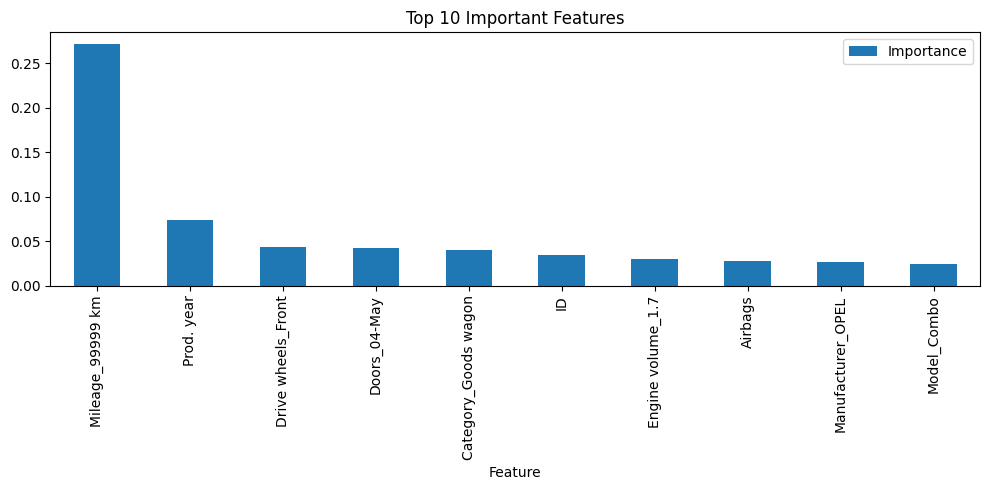

In [ ]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

# Random Forest pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

pipe.fit(X_train, y_train)


# Get feature names
ohe = pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
cat_ohe_features = ohe.get_feature_names_out(cat_features)
feature_names = np.concatenate([num_features, cat_ohe_features])

# Get feature importances
importances = pipe.named_steps['model'].feature_importances_

# Create DataFrame for visualization
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Plot Top 10
feat_df.sort_values(by='Importance', ascending=False).head(10).plot(
    kind='bar', x='Feature', y='Importance', title='Top 10 Important Features', figsize=(10, 5)
)
plt.tight_layout()
plt.show()


The feature importance plot indicates that Mileage is the most influential factor in predicting the target variable, followed by Production Year and Drive wheels.

Features like Doors, Vehicle Category, and ID also contribute moderately.

Key Insight:
Reducing mileage and newer production years likely increase the predicted value, making them critical for pricing or evaluation models.

In [ ]:
import joblib
joblib.dump(pipe,'car_model.pkl')

['car_model.pkl']